In [23]:
import numpy as np
import pandas as pd
df = pd.read_csv('/kaggle/input/movie-genreplotposter/Movie_combined.csv')
df
# Display the DataFrame

,Unnamed: 0,Title,Genre,Plot,Poster
0,0,the great train robbery,action,The film opens with two bandits breaking into ...,https://m.media-amazon.com/images/M/MV5BOWE4M2...
1,1,the suburbanite,comedy,The film is about a family who move to the sub...,https://m.media-amazon.com/images/M/MV5BMTUwOT...
2,2,how brown saw the baseball game,comedy,Before heading out to a baseball game at a nea...,0
3,5,the adventures of dollie,drama,On a beautiful summer day a father and mother ...,https://m.media-amazon.com/images/M/MV5BMDlmYz...
4,6,the black viper,drama,A thug accosts a girl as she leaves her workpl...,https://m.media-amazon.com/images/M/MV5BZDVjYT...
...,...,...,...,...,...
17298,21223,selam,drama,The film opens with a Senegalese boy named Kha...,https://m.media-amazon.com/images/M/MV5BMzEyMz...
17299,21224,particle (film),drama,"Zeynep lost her job at weaving factory, and he...",NaN
17300,21225,çalgı çengi i̇kimiz,comedy,"Two musicians, Salih and Gürkan, described the...",https://m.media-amazon.com/images/M/MV5BNWM0N2...
17301,21226,olanlar oldu,comedy,"Zafer, a sailor living with his mother Döndü i...",https://m.media-amazon.com/images/M/MV5BYWViZj...


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17303 entries, 0 to 17302
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  17303 non-null  int64 
 1   Title       17303 non-null  object
 2   Genre       17303 non-null  object
 3   Plot        17303 non-null  object
 4   Poster      16697 non-null  object
dtypes: int64(1), object(4)
memory usage: 676.0+ KB


In [25]:
# prompt: take a new dataframe with just name of movies, description and genre

df = df[['Title', 'Plot', 'Genre']]
df

,Title,Plot,Genre
0,the great train robbery,The film opens with two bandits breaking into ...,action
1,the suburbanite,The film is about a family who move to the sub...,comedy
2,how brown saw the baseball game,Before heading out to a baseball game at a nea...,comedy
3,the adventures of dollie,On a beautiful summer day a father and mother ...,drama
4,the black viper,A thug accosts a girl as she leaves her workpl...,drama
...,...,...,...
17298,selam,The film opens with a Senegalese boy named Kha...,drama
17299,particle (film),"Zeynep lost her job at weaving factory, and he...",drama
17300,çalgı çengi i̇kimiz,"Two musicians, Salih and Gürkan, described the...",comedy
17301,olanlar oldu,"Zafer, a sailor living with his mother Döndü i...",comedy


In [26]:
df = df.drop_duplicates(subset=['Plot'])

In [27]:
# df['Genre'] = df['Genre'].str.split(', ')
# df['Genre']

In [28]:
# # prompt: value_count the genre
# allowed_genres = ['Thriller', 'Action','Crime','Documentary', 'Comedy', 'Drama', 'Horror', 'Biography', 'Animation', 'Adventure']

# # Assuming df is your DataFrame with a 'Genre' column containing lists of genres
# def check_genre(genre_list):
#     for genre in genre_list:
#         if genre in allowed_genres:
#             return genre
#     return "Others"

# df['Genre'] = df['Genre'].apply(check_genre)
# df = df[df['Genre'] != 'Others']

df['Genre'].value_counts()


Genre
drama        5579
comedy       4160
action       3463
thriller     1925
romance       884
animation     573
Name: count, dtype: int64

In [29]:
labels = list(set(df["Genre"]))
id2label = {k:v for k,v in enumerate(labels)}
label2id = {v:k for k,v in enumerate(labels)}
label2id

{'comedy': 0,
 'romance': 1,
 'drama': 2,
 'thriller': 3,
 'animation': 4,
 'action': 5}

In [30]:
df["label"] = df["Genre"].apply(lambda x: label2id[x])

/tmp/ipykernel_42/2323231936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"] = df["Genre"].apply(lambda x: label2id[x])


In [31]:
# prompt: combine description and name of movie into 1 column with the form of name: {name of movie}, plot: {description}
df.drop(['Title', 'Genre'], axis=1, inplace=True)

/tmp/ipykernel_42/3993842172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Title', 'Genre'], axis=1, inplace=True)


In [32]:
df.columns = ['text', 'label']

In [33]:
from sklearn.model_selection import train_test_split

df_train, df_tmp = train_test_split(
        df, test_size=0.2)

df_val, df_test = train_test_split(
        df_tmp, test_size=0.5)

In [34]:
df_train

,text,label
3866,"Self-destructive, alcoholic nymphomaniac Maryl...",2
6775,Julia Robbins (Kim Delaney) is an emerging fas...,3
5123,"Ron ""Cat"" Catlan once led the New Orleans Sain...",2
15440,The story is about a private financer Eldho (U...,5
5295,"When Jack Mitchell (Peter Boyle), a married mi...",2
...,...,...
11747,Laramie Pilgrim (Yolande Donlan) is an America...,0
12445,"Wynne (Agutter), an adopted 14-year-old girl, ...",3
5498,"In the fictional country of Lugash, a mysterio...",0
882,Brown Derby waitress Mary Evans (Constance Ben...,2


In [35]:
pip install datasets

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [36]:
# prompt: put df train val and test into a dataset dict of huggingface
from datasets import Dataset
df_train = Dataset.from_pandas(df_train)
df_test = Dataset.from_pandas(df_test)
df_val = Dataset.from_pandas(df_val)
dataset = {
    'train': df_train,
    'validation': df_val,
    'test': df_test,
}
dataset['train']

Dataset({
    features: ['text', 'label', '__index_level_0__'],
    num_rows: 13267
})

In [37]:
from transformers import AutoTokenizer
# distilbert-base-uncased
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [38]:
def tokenize(examples):
    tokenized_inputs = tokenizer( examples['text'], padding=True, truncation=True )
    return tokenized_inputs


In [39]:
# prompt: apply tokenize function to dataset

dataset['train'] = dataset['train'].map(tokenize, batched=True, batch_size=None, remove_columns=['__index_level_0__'])
dataset['validation'] = dataset['validation'].map(tokenize, batched=True, batch_size=None, remove_columns=[ '__index_level_0__'])
dataset['test'] = dataset['test'].map(tokenize, batched=True, batch_size=None, remove_columns=['__index_level_0__'])


  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [40]:
dataset['train']

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 13267
})

In [41]:
from transformers import AutoModelForSequenceClassification, AutoConfig

num_labels = len(labels)

config = (AutoConfig
          .from_pretrained(model_ckpt, num_labels=num_labels,
                           label2id=label2id, id2label=id2label))

model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, config=config)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.bias', 'pre_classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [42]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [43]:
from transformers import (
    AdamW,
    AutoTokenizer,
    AutoModelForSequenceClassification,
    DataCollatorWithPadding,
    Trainer, 
    TrainingArguments,
    EarlyStoppingCallback,
    get_scheduler
)

In [44]:
from transformers import Trainer, TrainingArguments
from transformers import DataCollatorWithPadding
import gc
batch_size = 16
logging_steps = len(dataset["train"]) // batch_size
model_name ="./results"


data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
gc.collect()
training_args = TrainingArguments(
                    output_dir=model_name,
                    num_train_epochs=3,
                    learning_rate=2e-5,
                    per_device_train_batch_size=batch_size,
                    per_device_eval_batch_size=batch_size,
                    weight_decay=0.01,
                    logging_steps=logging_steps,
                    evaluation_strategy='steps',
                    eval_steps=20,
                    report_to='none'  
            )

trainer = Trainer(
                  model=model,
                  args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=dataset["train"],
                  eval_dataset=dataset["validation"],
                  data_collator=data_collator,
                  tokenizer=tokenizer
            )
trainer.train()


You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss,Validation Loss,Accuracy,F1
20,No log,1.545391,0.372738,0.238307
40,No log,1.418383,0.425211,0.308376
60,No log,1.317104,0.506031,0.450181
80,No log,1.283979,0.476478,0.408485
100,No log,1.233692,0.517491,0.467200
120,No log,1.177841,0.559107,0.510937
140,No log,1.159866,0.554282,0.522430
160,No log,1.124360,0.540410,0.499817
180,No log,1.069503,0.600121,0.578323
200,No log,1.049729,0.598914,0.576216


TrainOutput(global_step=2490, training_loss=0.7728685398657159, metrics={'train_runtime': 3193.3222, 'train_samples_per_second': 12.464, 'train_steps_per_second': 0.78, 'total_flos': 5272711032342528.0, 'train_loss': 0.7728685398657159, 'epoch': 3.0})

In [49]:
preds_output = trainer.predict(dataset["validation"])

In [50]:
preds_output.metrics

{'test_loss': 0.8586472868919373,
 'test_accuracy': 0.7020506634499397,
 'test_f1': 0.701484313919775,
 'test_runtime': 16.4147,
 'test_samples_per_second': 101.007,
 'test_steps_per_second': 6.336}

In [51]:
y_preds = np.argmax(preds_output.predictions, axis=1)
y_valid = np.array(df_val["label"])

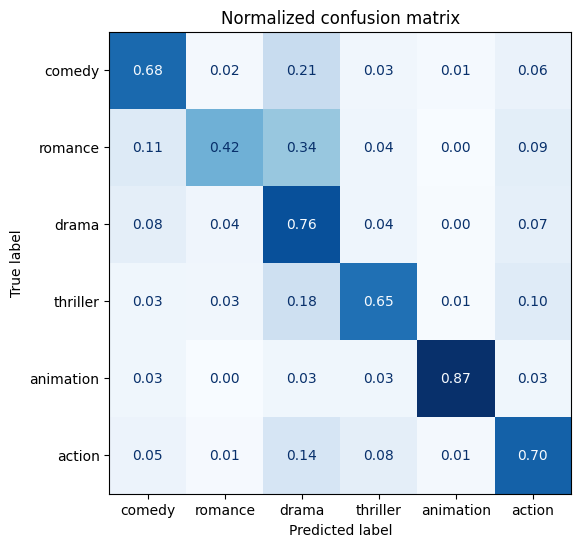

In [52]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

plot_confusion_matrix(y_preds, y_valid, labels)

In [66]:
from huggingface_hub import notebook_login

notebook_login()

In [75]:
trainer.push_to_hub("distilbert_base_uncased_movies")

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/4.22k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Upload 4 LFS files:   0%|          | 0/4 [00:00<?, ?it/s]

training_args.bin:   0%|          | 0.00/4.22k [00:00<?, ?B/s]

'https://huggingface.co/tuanHenry/results/tree/main/'